In [1]:
%load_ext autoreload
%autoreload 2
import uproot
import numpy as np
import awkward as ak
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import hist

import sys
sys.path.append("../..")
from functools import partial

from analyzer.computations.dnnInputs import *
from analyzer.dumperReader.dnnSampleReader import feature_axises, featureNamesByType_withoutPrefix, FeatureType
from analyzer.driver.fileTools import *
from analyzer.driver.computations import *

In [2]:
dumperInput = DumperInputManager(["/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v1/", "/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v7/"], limitFileCount=None)

unpack requires a buffer of 30 bytes
unpack requires a buffer of 30 bytes
unpack requires a buffer of 30 bytes
unpack requires a buffer of 30 bytes
unpack requires a buffer of 30 bytes
unpack requires a buffer of 30 bytes
unpack requires a buffer of 30 bytes


In [3]:
dumperInput.inputReaders

[SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v1/ticlNoSuperclsDumper_207.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v7/superclsDumper_207.root, DumperType.SuperclsSample=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v7/superclsDumper_207.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v1/ticlNoSuperclsDumper_203.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v7/superclsDumper_203.root, DumperType.SuperclsSample=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v7/superclsDumper_203.root, ),
 SingleInputReader(DumperType.TICL=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/reco-v1/ticlNoSuperclsDumper_202.root, DumperType.TICLsupercls=/data_cms_upgrade/cuisset/supercls/alessandro_electrons/supercls-v7/superclsDumper_202.root, DumperType.Supe

In [22]:
res = runComputations([seed_highestPt, pairs_highestPtSeed], dumperInput, max_workers=10)
highestPtSeed_df = res[0]
pairs_highestPtSeed_df = res[1]

In [23]:
highestPtSeed_df

seedTracksterIdx  \
eventInternal endcapInternal                     
0             0                            717   
              1                           2211   
1             0                            709   
              1                           2246   
2             0                            859   
...                                        ...   
997           1                           2286   
998           0                            614   
              1                           2265   
999           0                            634   
              1                           2251   

                              seedTracksterBestAssociationScore  \
eventInternal endcapInternal                                      
0             0                                        0.000024   
              1                                        0.000117   
1             0                                        0.000437   
              1                                        0.000200   
2             0                                        0.000388   
...                                                         ...   
997           1                                        0.000177   
998           0                                        0.000392   
              1                                        0.000442   
999           0                                        0.002395   
              1                                        0.003949   

                              feature_multi_en  feature_seedEta  \
eventInternal endcapInternal                                      
0             0                       1.912828        -1.701307   
              1                       1.765514         1.701492   
1             0                       2.663579        -2.224723   
              1                       5.384902         2.224825   
2             0                       2.716929        -2.260482   
...                                        ...              ...   
997           1                       1.974737         2.236658   
998           0                       1.636382        -2.183439   
              1                       0.945585         2.183934   
999           0                       1.826297        -2.572410   
              1                       2.610280         2.571164   

                              feature_seedPhi  feature_seedEn  feature_seedPt  \
eventInternal endcapInternal                                                    
0             0                      2.657912      220.100174       85.236519   
              1                     -0.520624      136.845169       50.998959   
1             0                      2.378382      320.283264       75.410316   
              1                     -0.772994      357.068787       84.082710   
2             0                     -1.816171      408.124939       92.618317   
...                                       ...             ...             ...   
997           1                      3.101079      400.815765       92.839172   
998           0                      1.847515      291.213531       71.271027   
              1                     -1.306235      276.707581       67.628006   
999           0                      2.641896      236.795578       39.678921   
              1                     -0.515143      240.609238       40.314404   

                              endcap  
eventInternal endcapInternal          
0             0                   -1  
              1                    1  
1             0                   -1  
              1                    1  
2             0                   -1  
...                              ...  
997           1                    1  
998           0                   -1  
              1                    1  
999           0                   -1  
              1                    1  

[2000 rows x 8 columns]

In [24]:
pairs_highestPtSeed_df

seedTracksterIdx  candidateTracksterIdx  \
eventInternal pairInternal                                            
0             0                          717                    475   
              1                          717                    315   
              2                          717                    478   
              3                          717                    329   
              4                          717                    320   
...                                      ...                    ...   
999           358                       2251                   1935   
              359                       2251                   2390   
              360                       2251                   2010   
              361                       2251                   2770   
              362                       2251                   1551   

                            seedTracksterBestAssociationScore  \
eventInternal pairInternal                                      
0             0                                      0.000024   
              1                                      0.000024   
              2                                      0.000024   
              3                                      0.000024   
              4                                      0.000024   
...                                                       ...   
999           358                                    0.003949   
              359                                    0.003949   
              360                                    0.003949   
              361                                    0.003949   
              362                                    0.003949   

                            candidateTracksterAssociationScoreWithSeed  \
eventInternal pairInternal                                               
0             0                                               0.001800   
              1                                               1.000000   
              2                                               0.996672   
              3                                               1.000000   
              4                                               0.004303   
...                                                                ...   
999           358                                             0.822931   
              359                                             1.000000   
              360                                             1.000000   
              361                                             1.000000   
              362                                             0.016436   

                            feature_DeltaEtaBaryc  feature_DeltaPhiBaryc  \
eventInternal pairInternal                                                 
0             0                          0.001970              -0.056797   
              1                          0.022055               0.257308   
              2                          0.025717              -0.286674   
              3                          0.074030              -3.963801   
              4                          0.013431              -0.179721   
...                                           ...                    ...   
999           358                        0.046489              -0.091501   
              359                       -0.038497               0.611943   
              360                       -0.028790               2.932502   
              361                       -0.056314               1.056129   
              362                       -0.002342               0.056891   

                            feature_multi_en  feature_multi_eta  \
eventInternal pairInternal                                        
0             0                    19.738678          -1.703277   
              1                     6.076009          -1.723362   
              2                     4.

## Pair properties

In [20]:
feature_plotSetting = {"multi_pt" : {"xrange" : (0, 50.)},
                       "explVarRatio" : {"xrange" : (0.8, 1.)}}
feature_noYlog = ["DeltaEtaBaryc", "DeltaPhiBaryc", "explVarRatio"]

def fillHistFeaturePair(feat:str, genMatchingThreshold:float):
    h = hist.Hist(feature_axises[feat], hist.axis.IntCategory([0, 1], name="candidateGenMatching", label="1 : genMatched, 0: nonGenMatched", flow=False), name=feat)
    h.fill(**{feat : pairs_highestPtSeed_df["feature_"+feat], "candidateGenMatching" : pairs_highestPtSeed_df.candidateTracksterAssociationScoreWithSeed < genMatchingThreshold})
    return h

def plotHistFeaturePair(h:hist.Hist):
    feat = h.name
    plt.figure(figsize=(7, 7))
    settings = feature_plotSetting.get(feat, dict())
    h.stack("candidateGenMatching").plot(density=True, yerr=False, label=["Non gen matched", "Gen matched"], color=["tab:blue", "tab:red"], flow="none")
    try:
        plt.xlim(*settings["xrange"])
    except: pass
    if feat not in feature_noYlog:
        plt.yscale("log")
    plt.legend()
    plt.ylabel("Events (a.u.)")

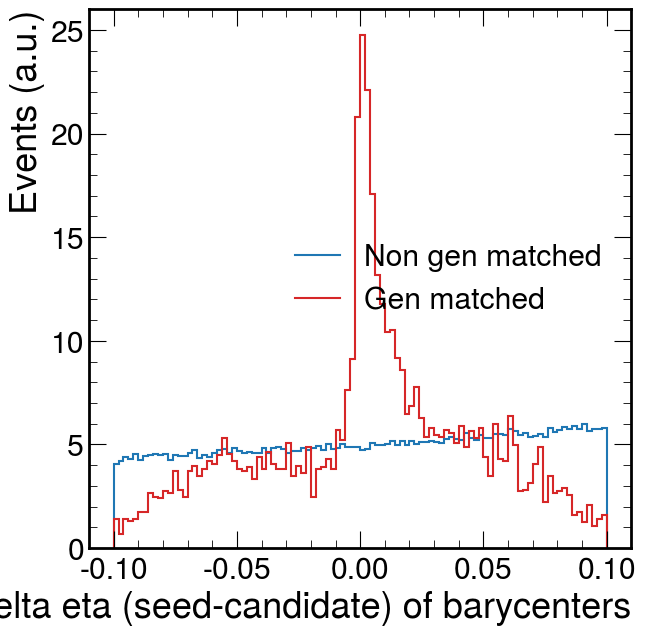

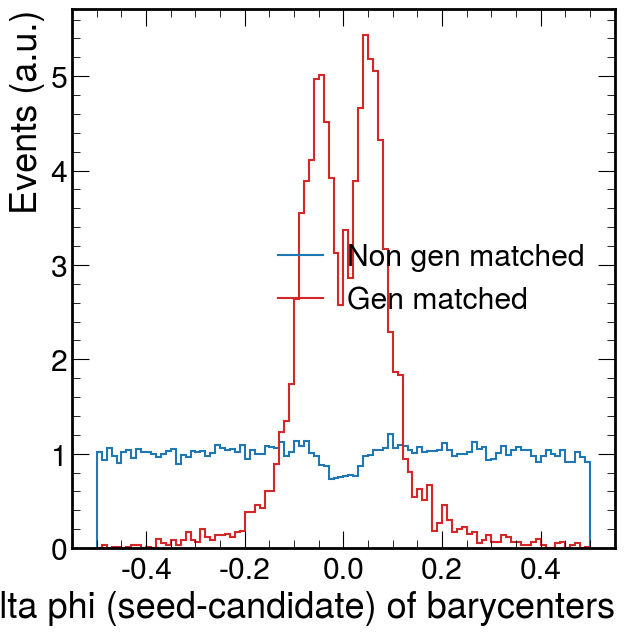

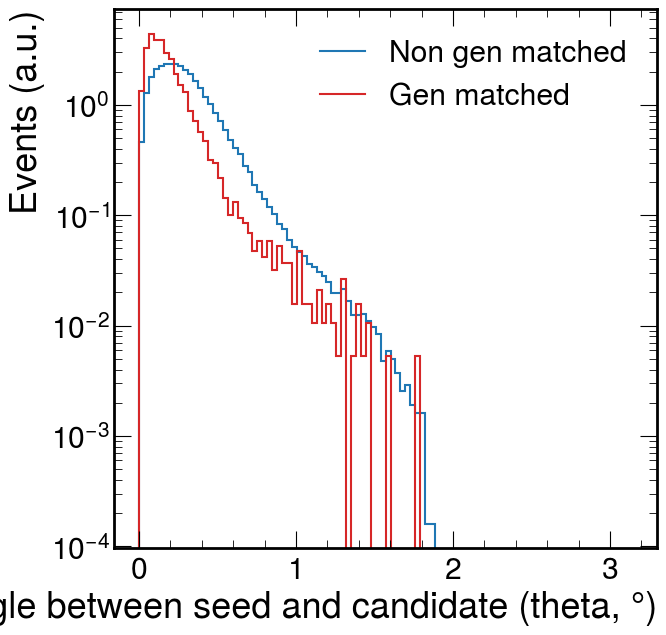

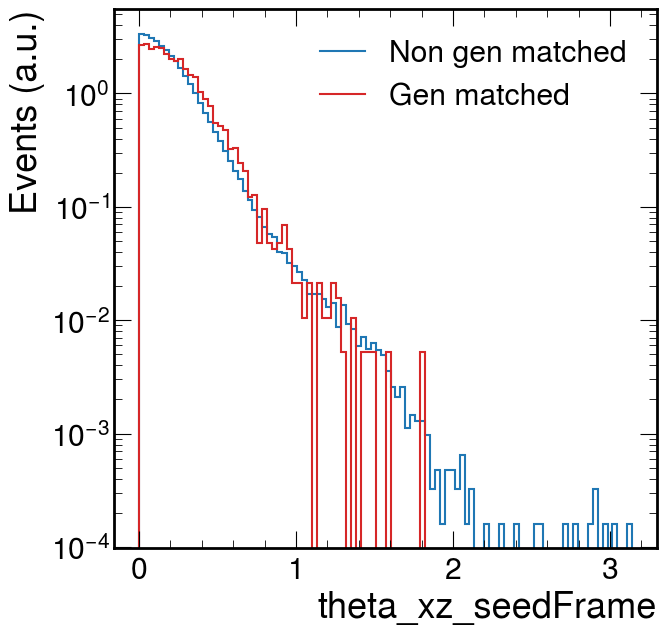

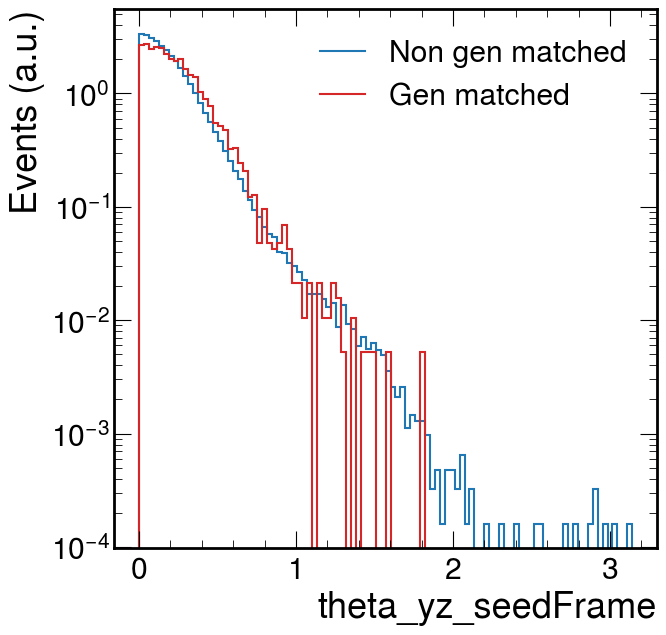

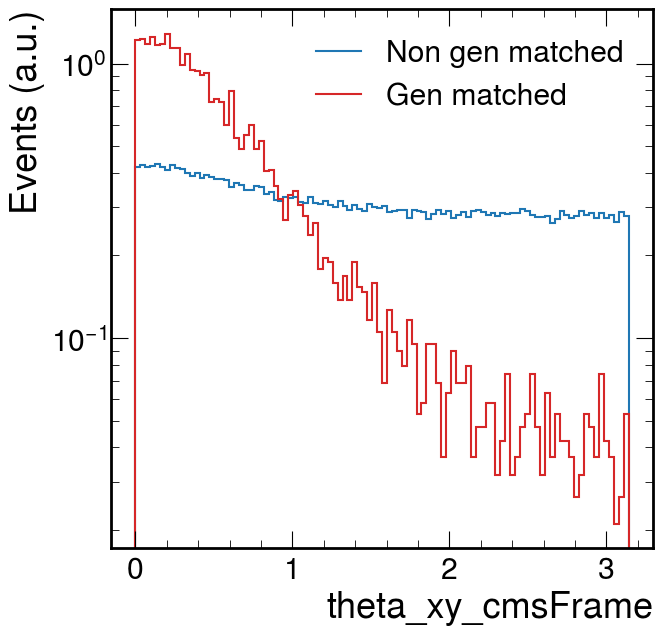

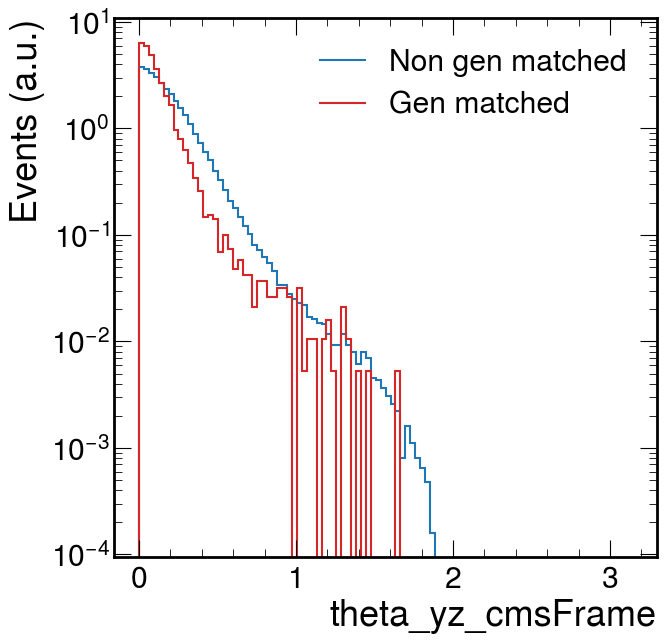

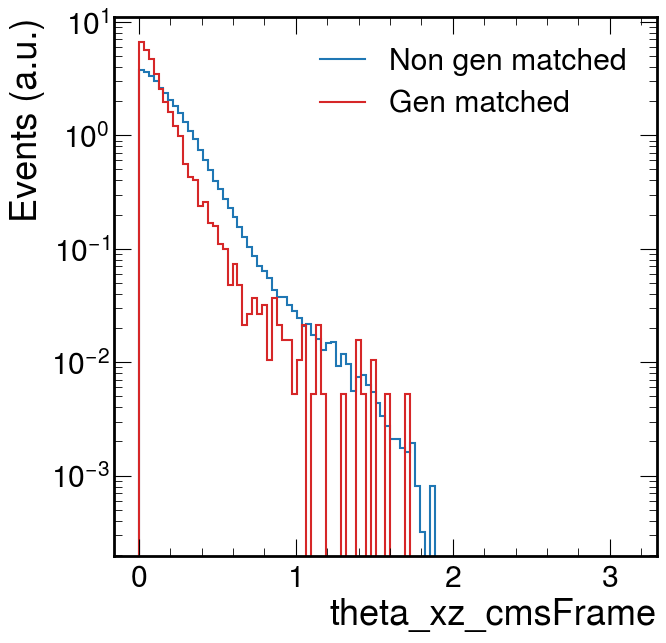

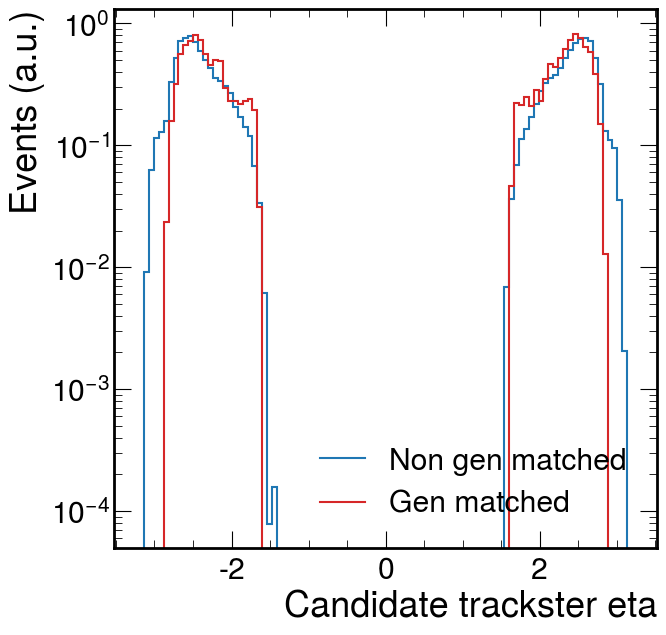

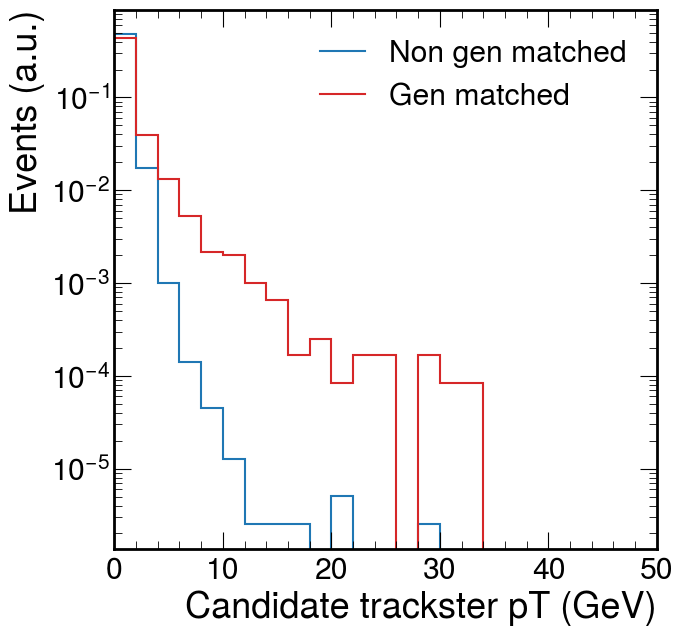

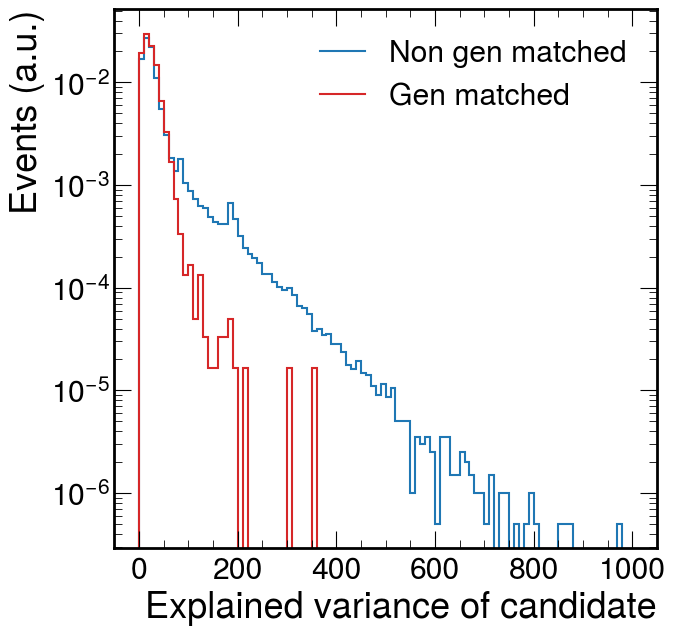

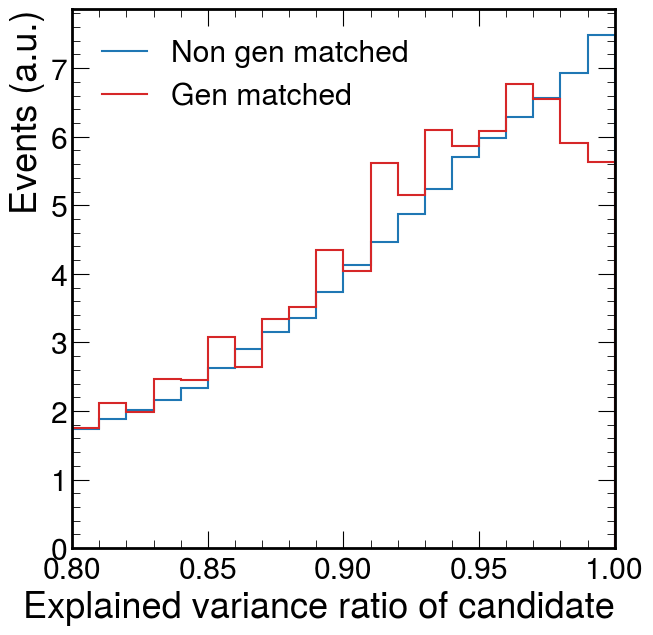

In [21]:
for feat in featureNamesByType_withoutPrefix[FeatureType.Pair]+featureNamesByType_withoutPrefix[FeatureType.Candidate]:
    plotHistFeaturePair(fillHistFeaturePair(feat, 0.5))